In [0]:
#Импорт необходимых  библеотек
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import  to_categorical
from keras import initializers
import keras

#подготовим датасет
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,28 * 28))
test_images = test_images.astype('float32')/255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


#функция,возвращающая модель с нужными нам функциями активации 

def model_mnist(initialization , activFunc):
  model = models.Sequential()
  #изменяем функции инициализации весов и функцию активациии на те,которые указали в uniform kerasпараметрах функции
  #за инициализацию весов отвечает параметр "kernel_initializer"
  #за функцию активации отвечает параметр "activation"
  model.add(layers.Dense(64,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros'))
  model.add(layers.Dense(10,activation ='softmax'))
  model.compile(optimizer="adagrad",loss='categorical_crossentropy',metrics=['accuracy'])
  return model

#функция,возвращающая необычную модель,с 64 нейронами,с 8 слоями 
#Вообще эта модель будет справлятся гораздо хуже,чем однослойная нейросеть,с таким же количеством нейронов ,но из за того,что в ней больше слоев,гораздо лучше прослеживается влияния инициализации весов,на результат. 

def model_mnist_long(initialization , activFunc):
  model = models.Sequential()
  #изменяем функции инициализации весов и функцию активациии на те,которые указали в параметрах функции
  #за инициализацию весов отвечает параметр "kernel_initializer"
  #за функцию активации отвечает параметр "activation"
  model.add(layers.Dense(8,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros')) 
  model.add(layers.Dense(8,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros')) 
  model.add(layers.Dense(8,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros')) 
  model.add(layers.Dense(8,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros')) 
  model.add(layers.Dense(8,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros')) 
  model.add(layers.Dense(8,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros')) 
  model.add(layers.Dense(8,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros')) 
  model.add(layers.Dense(8,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros')) 
    
  model.add(layers.Dense(10,activation ='softmax'))
  model.compile(optimizer="adagrad",loss='categorical_crossentropy',metrics=['accuracy'])
  return model


In [0]:
# создаем модель c случайной инициализацикй и tang функцией активации
model = model_mnist("uniform","tanh")

# обучаем модель
res_learning = model.fit(train_images,train_labels,epochs= 30,batch_size=64,verbose=0 , validation_data=(test_images,test_labels))
print(res_learning.history["acc"])


# создаем длинную модель c случайной инициализацикй и tang функцией активации
model = model_mnist_long("uniform","tanh")

# обучаем модель
res_learning = model.fit(train_images,train_labels,epochs= 30,batch_size=64,verbose=0 , validation_data=(test_images,test_labels))
print(res_learning.history["acc"])





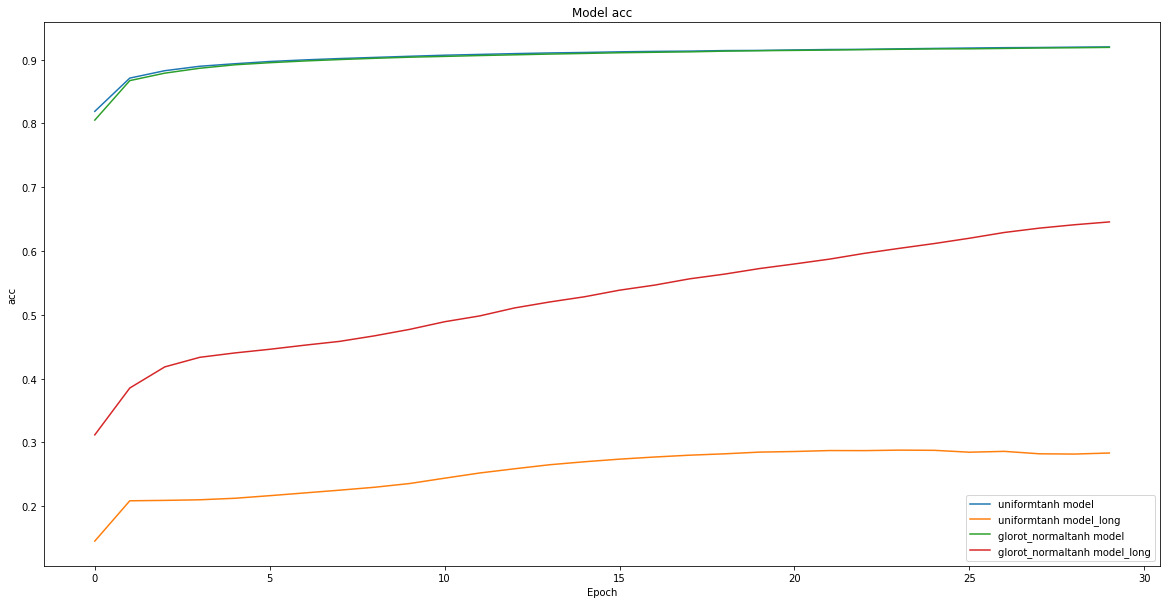

In [6]:
"""
Как можно заметить,для того,чтобы повторить это с другими парами функций 
активации и инициализаци нужно повторить этот же код еще несколько раз
сделаем это при помощи цикла
""" 
#создаем массив всех пар,функций активации и инициализации весов
param = [["uniform","tanh"],
         ["glorot_normal","tanh"],
         ["he_normal","sigmoid"],
         ["glorot_normal","sigmoid"],
         ["uniform","relu"],
         ["he_normal","relu"],
         ['glorot_normal','relu']]
res = []
legend_mass = []

# обучим на первых двух парах
for i in range(2):

  model = model_mnist(param[i][0],param[i][1])
  res_learning = model.fit(train_images,train_labels,epochs= 30,batch_size=64,verbose=0 , validation_data=(test_images,test_labels))
  res.append(res_learning)
  legend_mass.append(param[i][0]+param[i][1]+" model")
  model2 = model_mnist_long(param[i][0],param[i][1])
  res_learning = model2.fit(train_images,train_labels,epochs= 30,batch_size=64,verbose=0 , validation_data=(test_images,test_labels))
  res.append(res_learning)
  legend_mass.append(param[i][0]+param[i][1]+" model_long")
#нарисуем график результатов
plt.figure(figsize=(20,10))
for i in res:
  plt.plot(range(0,30),i.history['acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(legend_mass  , loc='lower right')
plt.show()




  

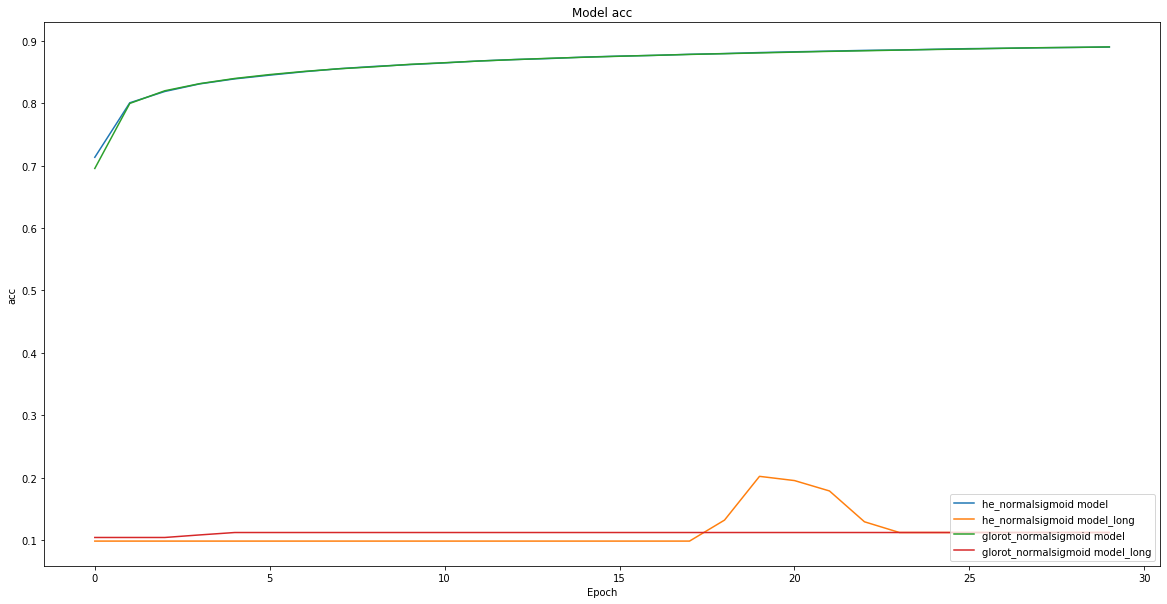

In [7]:
res = []
legend_mass = []

# обучим на следующих двух парах
for i in [2,3]:

  model = model_mnist(param[i][0],param[i][1])
  res_learning = model.fit(train_images,train_labels,epochs= 30,batch_size=64,verbose=0 , validation_data=(test_images,test_labels))
  res.append(res_learning)
  legend_mass.append(param[i][0]+param[i][1]+" model")
  model2 = model_mnist_long(param[i][0],param[i][1])
  res_learning = model2.fit(train_images,train_labels,epochs= 30,batch_size=64,verbose=0 , validation_data=(test_images,test_labels))
  res.append(res_learning)
  legend_mass.append(param[i][0]+param[i][1]+" model_long")
#нарисуем график результатов
plt.figure(figsize=(20,10))
for i in res:
  plt.plot(range(0,30),i.history['acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(legend_mass  , loc='lower right')
plt.show()

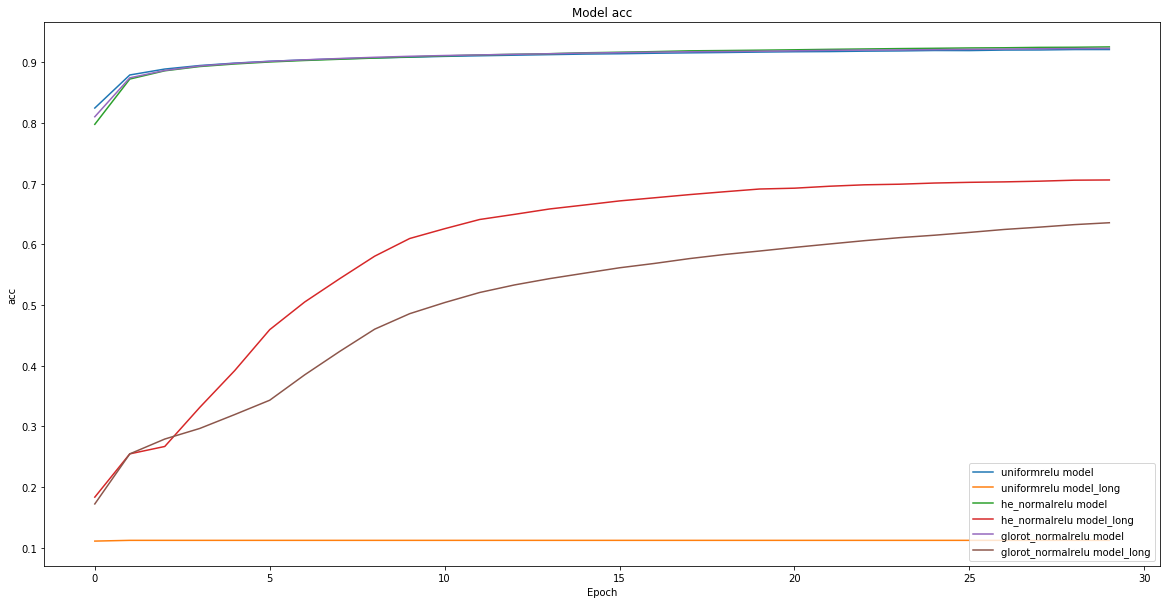

In [8]:
res = []
legend_mass = []

# обучим на последних трех
for i in [4,5,6]:

  model = model_mnist(param[i][0],param[i][1])
  res_learning = model.fit(train_images,train_labels,epochs= 30,batch_size=64,verbose=0 , validation_data=(test_images,test_labels))
  res.append(res_learning)
  legend_mass.append(param[i][0]+param[i][1]+" model")
  model2 = model_mnist_long(param[i][0],param[i][1])
  res_learning = model2.fit(train_images,train_labels,epochs= 30,batch_size=64,verbose=0 , validation_data=(test_images,test_labels))
  res.append(res_learning)
  legend_mass.append(param[i][0]+param[i][1]+" model_long")
plt.figure(figsize=(20,10))
#нарисуем график результатов
for i in res:
  plt.plot(range(0,30),i.history['acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(legend_mass  , loc='lower right')
plt.show()
